## 是否考虑Q2和Q3的模型继承性？

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16)  # 这里假设SimSun字体路径，根据实际情况调整

def preprocess_data(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X = pd.get_dummies(X, drop_first=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accuracy = cv_scores.mean()
    auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    
    # Calculate Type I and Type II errors
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / (fp + tn)
    type2_error = fn / (fn + tp)
    
    return accuracy, auc, f1, type1_error, type2_error

def analyze_dataset(df, target_column, dataset_name):
    X, y = preprocess_data(df, target_column)
    
    models = {
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(probability=True)
    }
    
    results = []
    
    for model_name, model in models.items():
        accuracy, auc, f1, type1_error, type2_error = evaluate_model(model, X, y)
        results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'AUC': auc,
            'F1-score': f1,
            'Type I Error': type1_error,
            'Type II Error': type2_error
        })
    
    return pd.DataFrame(results)

# Load datasets
german_df = pd.read_csv('..\Data\data1.csv')
australian_df = pd.read_csv('..\Data\data2.csv')

# Analyze German Credit Dataset
german_results = analyze_dataset(german_df, 'Y(1=default, 0=non-default)', 'German Credit')

# Analyze Australian Credit Dataset
australian_results = analyze_dataset(australian_df, 'Y(1=default, 0=non-default)', 'Australian Credit')

# Combine results
all_results = pd.concat([german_results, australian_results])

# Display results
print(all_results.to_string(index=False))



          Dataset         Model  Accuracy      AUC  F1-score  Type I Error  Type II Error
    German Credit       XGBoost  0.733000 0.762905  0.520157      0.113475       0.355932
    German Credit Decision Tree  0.684000 0.628333  0.463446      0.241135       0.457627
    German Credit Random Forest  0.754000 0.779988  0.503636      0.078014       0.644068
    German Credit           SVM  0.756000 0.785167  0.486047      0.085106       0.542373
Australian Credit       XGBoost  0.875362 0.927706  0.886974      0.176471       0.114943
Australian Credit Decision Tree  0.817391 0.808477  0.839250      0.235294       0.091954
Australian Credit Random Forest  0.865217 0.930903  0.874368      0.196078       0.091954
Australian Credit           SVM  0.852174 0.914020  0.861538      0.215686       0.126437


In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, make_scorer
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import GridSearchCV

# def preprocess_data(df, target_column):
#     X = df.drop(target_column, axis=1)
#     y = df[target_column]
#     X = pd.get_dummies(X, drop_first=True)
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
#     return X_scaled, y

# def custom_f1_score(y_true, y_pred):
#     tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     precision = tp / (tp + fp)
#     recall = tp / (tp + fn)
#     f1 = 2 * (precision * recall) / (precision + recall)
#     return f1

# def evaluate_model(model, X, y):
#     cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#     accuracy = cv_scores.mean()
#     auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
#     f1 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(custom_f1_score)).mean()
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#     type1_error = fp / (fp + tn)
#     type2_error = fn / (fn + tp)
    
#     return accuracy, auc, f1, type1_error, type2_error

# def optimize_xgboost(X, y):
#     # 计算类别权重
#     class_weights = dict(zip(np.unique(y), len(y) / (len(np.unique(y)) * np.bincount(y))))
    
#     # 使用SMOTE过采样
#     smote = SMOTE(random_state=42)
#     X_resampled, y_resampled = smote.fit_resample(X, y)
    
#     # 设置参数网格
#     param_grid = {
#         'max_depth': [3, 4, 5],
#         'learning_rate': [0.01, 0.1, 0.3],
#         'n_estimators': [100, 200, 300],
#         'min_child_weight': [1, 3, 5],
#         'gamma': [0, 0.1, 0.2],
#         'subsample': [0.8, 0.9, 1.0],
#         'colsample_bytree': [0.8, 0.9, 1.0]
#     }
    
#     # 初始化XGBoost模型
#     xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weights[1])
    
#     # 使用GridSearchCV进行参数优化
#     grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
#     grid_search.fit(X_resampled, y_resampled)
    
#     # 获取最佳模型
#     best_model = grid_search.best_estimator_
    
#     return best_model

# # 加载德国信用数据集
# german_df = pd.read_csv('../Data/data_1.csv')

# # 预处理数据
# X, y = preprocess_data(german_df, 'Y(1=default, 0=non-default)')

# # 优化XGBoost模型
# optimized_xgb = optimize_xgboost(X, y)

# # 评估优化后的模型
# accuracy, auc, f1, type1_error, type2_error = evaluate_model(optimized_xgb, X, y)

# print("Optimized XGBoost Results:")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"AUC: {auc:.4f}")
# print(f"F1-score: {f1:.4f}")
# print(f"Type I Error: {type1_error:.4f}")
# print(f"Type II Error: {type2_error:.4f}")

Optimized XGBoost Results:
Accuracy: 0.7530
AUC: 0.7893
F1-score: 0.6029
Type I Error: 0.1702
Type II Error: 0.3729


### 结果可视化及数据存储

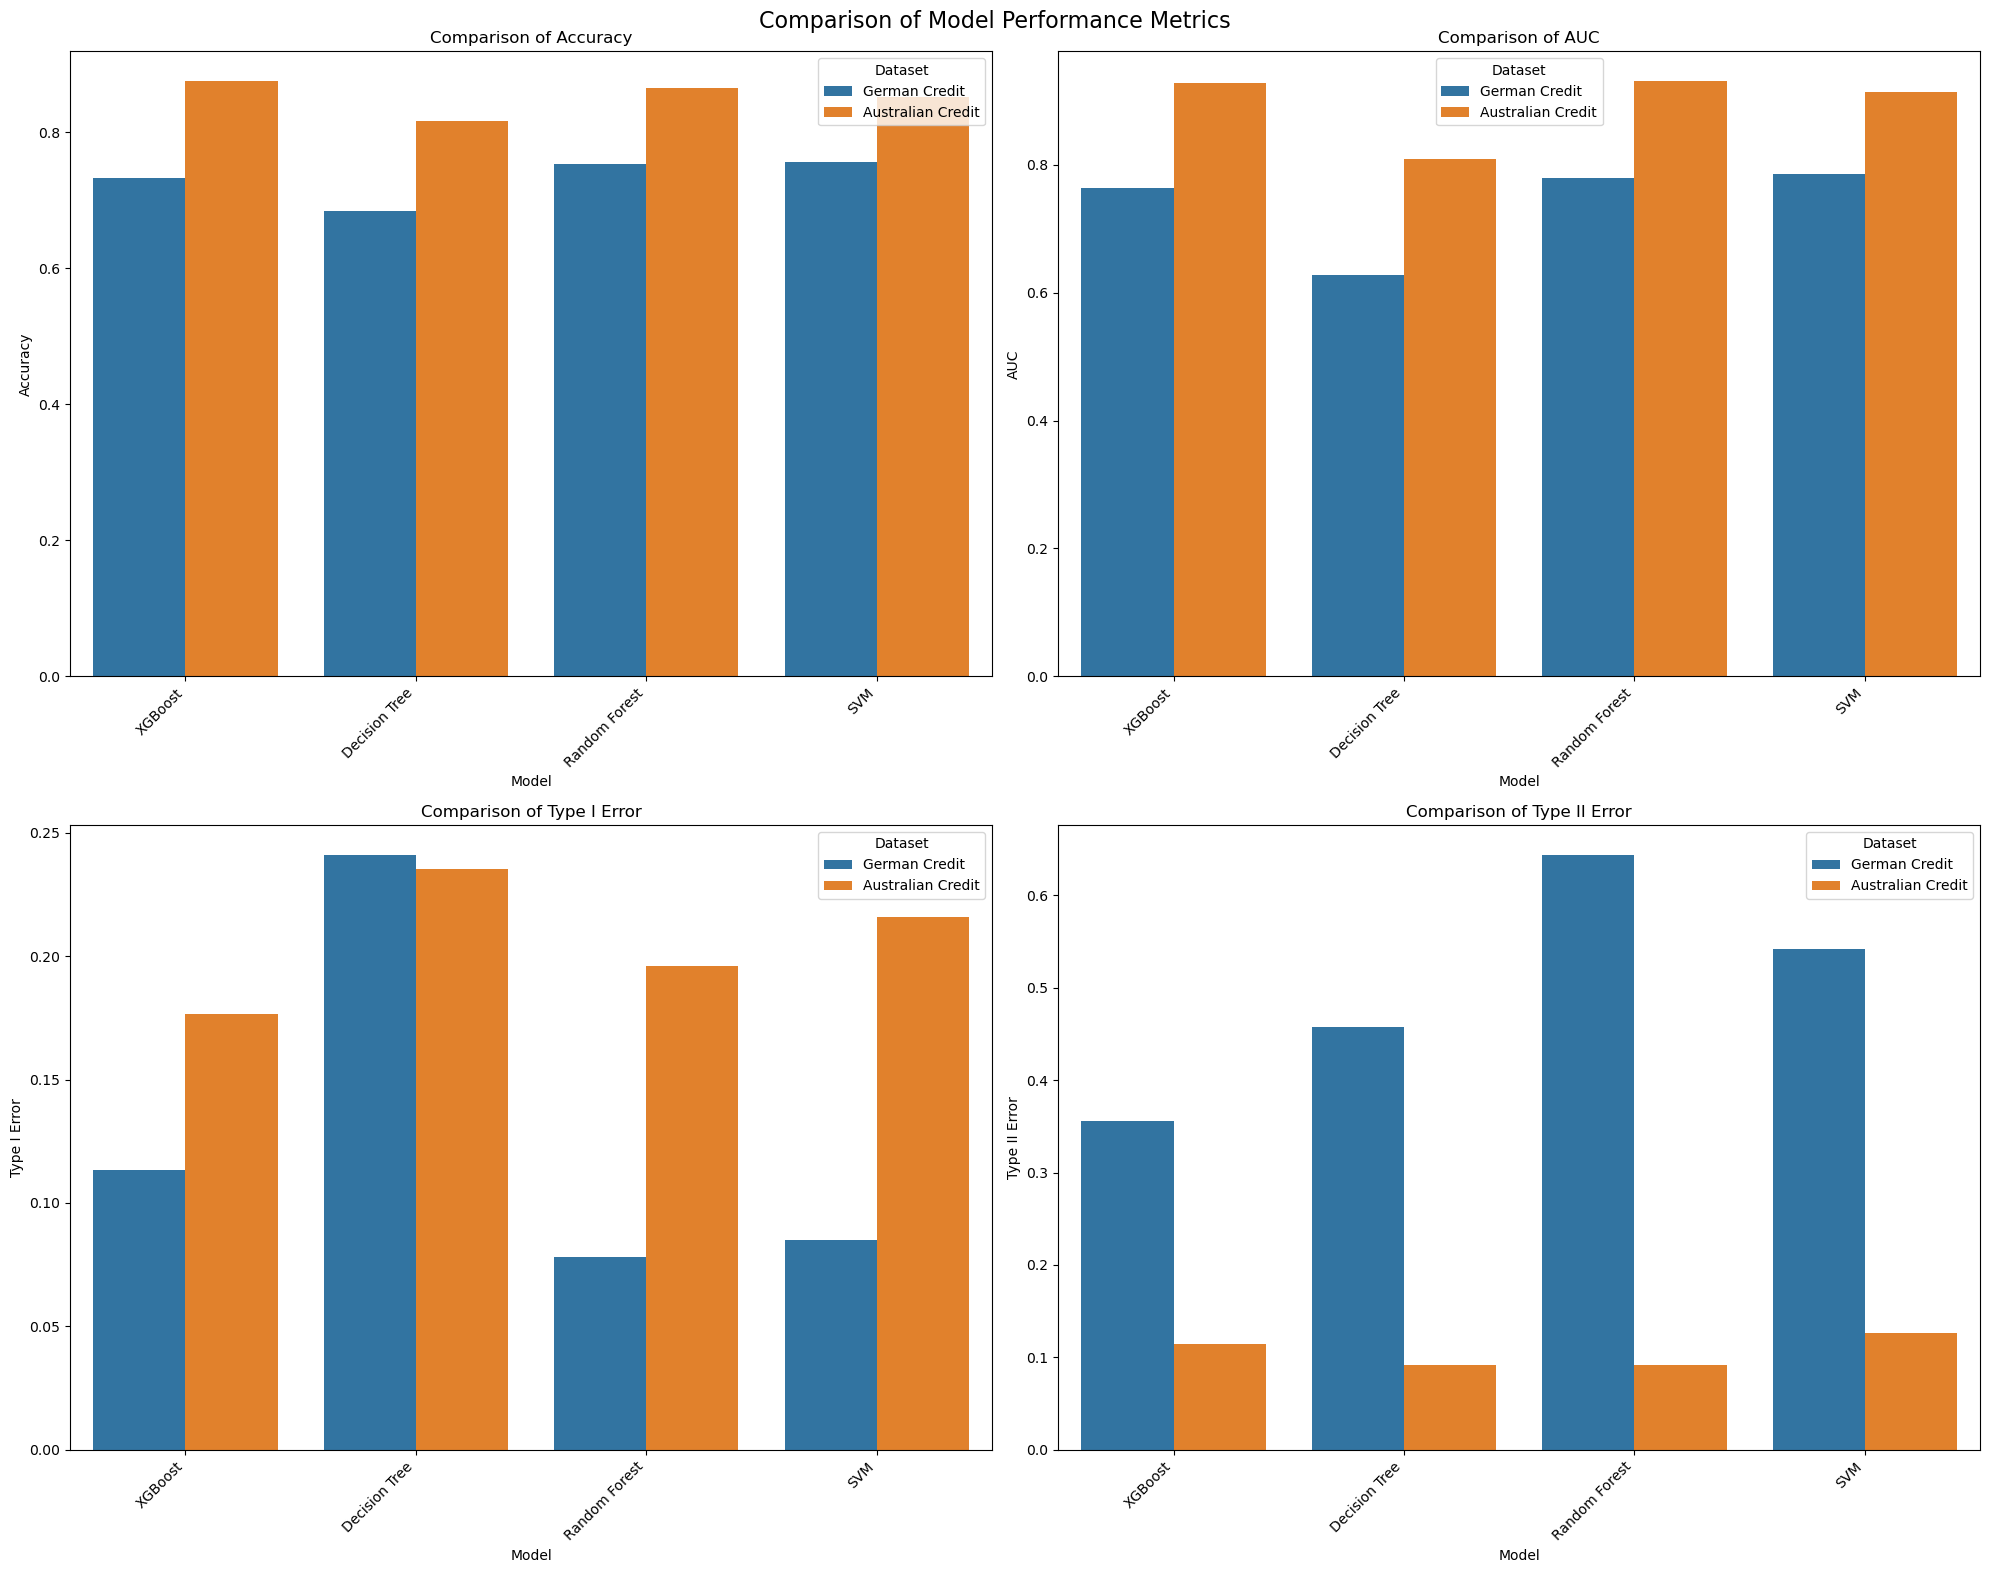


Results saved to 'Q3_credit_model_comparison_results.csv'
Visualization saved to 'Q3_Performance_Metrics_Comparison.png'


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 all_results 是包含所有结果的 DataFrame

# 创建一个 2x2 的子图
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparison of Model Performance Metrics', fontsize=16)

# 定义要绘制的指标和它们的位置
metrics = [
    ('Accuracy', axs[0, 0]),
    ('AUC', axs[0, 1]),
    ('Type I Error', axs[1, 0]),
    ('Type II Error', axs[1, 1])
]

# 为每个指标创建一个子图
for metric, ax in metrics:

    # 需要蔺经纬同志调配色！
    sns.barplot(x='Model', y=metric, hue='Dataset', data=all_results, ax=ax)
    # 需要蔺经纬同志调配色！
    
    ax.set_title(f'Comparison of {metric}',fontproperties=font)
    ax.set_xlabel('Model',fontproperties=font)
    ax.set_ylabel(metric,fontproperties=font)
    ax.legend(title='Dataset')
    
    # 调整 x 轴标签的角度，以防止重叠
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('..\Data\Q3_Performance_Metrics_Comparison.png')
plt.show()

# Save results to CSV
all_results.to_csv('..\Data\Q3_credit_model_comparison_results.csv', index=False)
print("\nResults saved to 'Q3_credit_model_comparison_results.csv'")
print("Visualization saved to 'Q3_Performance_Metrics_Comparison.png'")